In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ha_data_assessement.csv')
df.head()

,city,category,country_code,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
0,Trento,Shared Room,it,2016-03-12 12:31:31,190.0,"""yes""",NaN,NaN,"""no""","""yes""","""no""","""no""","""no"""
1,Milan,Apartment,it,2019-11-14 14:48:10,3200.0,"""yes""","""50""","""yes""","""yes""","""yes""",NaN,"""no""",NaN
2,Milan,Shared Room,it,2019-10-07 10:08:21,660.0,"""yes""","""180""",NaN,"""yes""",NaN,NaN,NaN,NaN
3,Pisa,Shared Room,it,2017-07-05 11:41:57,245.0,"""yes""","""140""","""no""","""yes""","""no""",NaN,"""no""",NaN
4,Bologna,Private Room,it,2017-11-16 08:55:46,500.0,"""yes""","""18""",NaN,"""yes""","""no""",NaN,NaN,NaN


Extremely sus max price, worth investigating further

In [3]:
df.describe()

,price
count,10000.000000
mean,670.433532
std,2429.999459
min,0.010000
25%,285.000000
50%,400.000000
75%,650.000000
max,190205.000000


All of the listings are from Italy, country code is useless, doesn't really matter in this case, all the columns are visible regardless, but still, good practice

In [4]:
df = df.drop('country_code', axis=1)

at least some of the columns do not contain nulls \
created_at, total_size as an object. \
5% of unknown city is unpleasant, ~50% of unknown size of the rental property is extremely alarming.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   9404 non-null   object 
 1   category               9401 non-null   object 
 2   created_at             10000 non-null  object 
 3   price                  10000 non-null  float64
 4   furnished              6803 non-null   object 
 5   total_size             5112 non-null   object 
 6   registration_possible  4977 non-null   object 
 7   washing_machine        7929 non-null   object 
 8   tv                     7031 non-null   object 
 9   balcony                2137 non-null   object 
 10  garden                 6729 non-null   object 
 11  terrace                2086 non-null   object 
dtypes: float64(1), object(11)
memory usage: 937.6+ KB


In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [7]:
df.dtypes

city                             object
category                         object
created_at               datetime64[ns]
price                           float64
furnished                        object
total_size                       object
registration_possible            object
washing_machine                  object
tv                               object
balcony                          object
garden                           object
terrace                          object
dtype: object

In [8]:
df['city'] = df['city'].fillna('Unknown')

I'd expect Rome to be at least in Top3, not being in Top5 is crazy.

In [9]:
df['city'].value_counts().head(7)

city
Milan       2147
Bologna     1873
Pisa        1514
Florence    1278
Turin        625
Unknown      596
Rome         582
Name: count, dtype: int64

# Stripping the "" out of all yes and no and total_size

In [10]:
columns_to_clean = ['furnished', 'total_size', 'registration_possible', 'washing_machine', 'tv', 'balcony', 'garden', 'terrace']

def fix_formatting(df, columns_to_clean):
    for col in columns_to_clean:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: x.strip('"') if pd.notna(x) else x)
    
    return df

fix_formatting(df, columns_to_clean)

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
0,Trento,Shared Room,2016-03-12 12:31:31,190.0,yes,NaN,NaN,no,yes,no,no,no
1,Milan,Apartment,2019-11-14 14:48:10,3200.0,yes,50,yes,yes,yes,NaN,no,NaN
2,Milan,Shared Room,2019-10-07 10:08:21,660.0,yes,180,NaN,yes,NaN,NaN,NaN,NaN
3,Pisa,Shared Room,2017-07-05 11:41:57,245.0,yes,140,no,yes,no,NaN,no,NaN
4,Bologna,Private Room,2017-11-16 08:55:46,500.0,yes,18,NaN,yes,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Florence,Private Room,2016-07-05 14:35:08,300.0,,NaN,NaN,,,,,
9996,Bologna,Private Room,2016-05-31 15:25:42,380.0,,NaN,NaN,yes,,shared,,
9997,Milan,Private Room,2017-03-21 12:37:46,560.0,NaN,130,yes,yes,NaN,NaN,no,NaN
9998,Catania,Private Room,2016-04-29 20:09:30,215.0,yes,NaN,NaN,yes,no,no,no,shared


In [11]:
df['total_size'] = pd.to_numeric(df['total_size'], errors='coerce')
df.head()

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
0,Trento,Shared Room,2016-03-12 12:31:31,190.0,yes,NaN,NaN,no,yes,no,no,no
1,Milan,Apartment,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,NaN,no,NaN
2,Milan,Shared Room,2019-10-07 10:08:21,660.0,yes,180.0,NaN,yes,NaN,NaN,NaN,NaN
3,Pisa,Shared Room,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,NaN,no,NaN
4,Bologna,Private Room,2017-11-16 08:55:46,500.0,yes,18.0,NaN,yes,no,NaN,NaN,NaN


In [12]:
df.sort_values('total_size', ascending=False).head()

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
4496,Trento,Private Room,2017-06-06 14:12:14,230.0,yes,10000.0,no,yes,no,NaN,NaN,NaN
6167,Milan,Shared Room,2019-11-11 10:38:25,430.0,yes,5000.0,yes,yes,no,NaN,shared,NaN
5458,Milan,Shared Room,2019-11-11 08:52:17,430.0,yes,5000.0,yes,yes,no,NaN,shared,NaN
8702,Milan,Shared Room,2019-11-11 09:21:56,490.0,yes,5000.0,yes,yes,no,NaN,shared,NaN
5022,Milan,Shared Room,2019-11-11 09:21:51,700.0,yes,5000.0,yes,yes,no,NaN,shared,NaN


In [13]:
df.describe()

,created_at,price,total_size
count,10000,10000.000000,4489.000000
mean,2017-12-08 10:55:01.855800064,670.433532,108.173535
min,2016-01-01 17:04:41,0.010000,-135.000000
25%,2017-01-03 13:02:45.500000,285.000000,55.000000
50%,2017-09-08 15:48:49.500000,400.000000,85.000000
75%,2018-12-20 11:05:04.500000,650.000000,120.000000
max,2020-02-09 15:02:49,190205.000000,10000.000000
std,NaN,2429.999459,271.219963


In [14]:
df.dtypes

city                             object
category                         object
created_at               datetime64[ns]
price                           float64
furnished                        object
total_size                      float64
registration_possible            object
washing_machine                  object
tv                               object
balcony                          object
garden                           object
terrace                          object
dtype: object

In [15]:
average_price = df.groupby(['city', 'category'])['price'].mean().reset_index()
average_price

,city,category,price
0,Ancona,Apartment,272.500000
1,Ancona,Private Room,230.450980
2,Ancona,Shared Room,147.666667
3,Ancona,Studio,310.000000
4,Bari,Apartment,300.000000
...,...,...,...
98,Venice,Studio,690.000000
99,Verona,Apartment,1273.913043
100,Verona,Private Room,443.450000
101,Verona,Shared Room,263.000000


In [16]:
sort_by_price = df.sort_values(by='price', ascending=False)
sort_by_price.head(20)

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
211,Trieste,NaN,2016-01-20 13:10:36,190205.00,,NaN,NaN,yes,,shared,,shared
3636,Rome,Shared Room,2019-06-11 08:58:48,100000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2124,Unknown,Private Room,2016-08-16 09:58:23,89745.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,Unknown,NaN,2018-10-18 20:16:11,25000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9796,Milan,Apartment,2019-06-22 20:55:55,12000.00,yes,360.0,yes,yes,yes,NaN,NaN,NaN
3883,Rome,NaN,2016-09-27 12:07:17,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5379,Unknown,Apartment,2019-02-05 15:05:50,10000.00,yes,100.0,no,no,yes,NaN,shared,NaN
8472,Rome,Apartment,2018-11-29 13:00:36,9729.76,,NaN,,yes,yes,,,
7587,Rome,Apartment,2018-11-29 12:53:04,8985.76,,NaN,,yes,yes,,no,
9697,Milan,Apartment,2018-11-29 13:23:59,8856.39,,NaN,,yes,yes,,,


In [17]:
df[df['city'] == 'Trieste']['price'].median()

230.0

In [18]:
num_rows_all_null = df[df[['furnished', 'total_size', 'registration_possible', 'washing_machine', 'tv', 'balcony', 'garden', 'terrace']].isnull().all(axis=1)]
num_rows_all_null

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
9,Pisa,Private Room,2019-02-09 18:36:21,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Pisa,Private Room,2017-10-02 13:54:59,310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Ancona,Private Room,2016-06-28 16:48:25,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Parma,Studio,2017-06-12 19:32:37,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Unknown,NaN,2019-05-02 12:10:41,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,Brescia,Private Room,2018-06-28 15:38:13,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9976,Pisa,NaN,2017-03-29 14:18:31,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9986,Bologna,Private Room,2017-05-08 15:27:05,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9987,Unknown,Shared Room,2018-07-08 09:53:10,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
num_rows_unknown_city_and_nan_category = df[(df['city'] == 'Unknown') & df['category'].isna()]
num_rows_unknown_city_and_nan_category.sort_values('price', ascending=False)

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
1054,Unknown,NaN,2018-10-18 20:16:11,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404,Unknown,NaN,2019-04-13 15:11:05,8000.0,yes,300.0,yes,yes,yes,NaN,private,NaN
1195,Unknown,NaN,2017-01-09 13:28:15,6000.0,yes,NaN,NaN,yes,yes,NaN,private,NaN
3881,Unknown,NaN,2019-11-19 09:42:41,3500.0,yes,150.0,yes,yes,yes,NaN,private,NaN
157,Unknown,NaN,2019-11-07 11:47:25,3200.0,yes,240.0,no,yes,yes,NaN,shared,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7499,Unknown,NaN,2016-04-22 15:37:57,150.0,NaN,NaN,NaN,yes,yes,shared,shared,shared
5480,Unknown,NaN,2016-04-13 07:13:02,22.0,yes,NaN,NaN,no,no,shared,shared,shared
1859,Unknown,NaN,2016-06-10 10:06:07,10.0,yes,NaN,NaN,yes,yes,shared,shared,shared
5733,Unknown,NaN,2017-10-18 18:41:15,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = df[~((df['city'] == 'Unknown') & df['category'].isna())]

In [21]:
df

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
0,Trento,Shared Room,2016-03-12 12:31:31,190.0,yes,NaN,NaN,no,yes,no,no,no
1,Milan,Apartment,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,NaN,no,NaN
2,Milan,Shared Room,2019-10-07 10:08:21,660.0,yes,180.0,NaN,yes,NaN,NaN,NaN,NaN
3,Pisa,Shared Room,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,NaN,no,NaN
4,Bologna,Private Room,2017-11-16 08:55:46,500.0,yes,18.0,NaN,yes,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Florence,Private Room,2016-07-05 14:35:08,300.0,,NaN,NaN,,,,,
9996,Bologna,Private Room,2016-05-31 15:25:42,380.0,,NaN,NaN,yes,,shared,,
9997,Milan,Private Room,2017-03-21 12:37:46,560.0,NaN,130.0,yes,yes,NaN,NaN,no,NaN
9998,Catania,Private Room,2016-04-29 20:09:30,215.0,yes,NaN,NaN,yes,no,no,no,shared


In [22]:
df[df['category'].isin(['Shared Room', 'Private Room'])].sort_values('price', ascending=False)

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
3636,Rome,Shared Room,2019-06-11 08:58:48,100000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2124,Unknown,Private Room,2016-08-16 09:58:23,89745.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Unknown,Private Room,2017-07-13 13:56:34,8000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,Bologna,Private Room,2016-08-11 17:20:55,3660.00,yes,NaN,NaN,yes,,no,no,no
5428,Florence,Shared Room,2016-06-22 12:00:26,3245.00,NaN,100.0,NaN,NaN,yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5790,Bologna,Private Room,2016-03-02 14:42:01,1.00,yes,NaN,NaN,yes,yes,NaN,shared,NaN
2942,Bologna,Private Room,2016-09-09 13:41:22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9230,Unknown,Private Room,2016-05-19 14:42:12,1.00,yes,NaN,NaN,yes,no,no,NaN,no
1546,Unknown,Private Room,2016-06-30 07:50:51,0.15,,NaN,NaN,,,,,


What I am thinking here is what could be done with those exorbitant price numbers for a room
Divide by 10 sounds like a reasonable solution, so that 8000 becomes 800 and 3660 -> 366. If I had a confirmation that's the case I'd probably proceed with it.

In [23]:
df[((df['category'].isin(['Shared Room', 'Private Room'])) & ((df['price'] < 150) | (df['price'] > 1500)))]

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
85,Unknown,Private Room,2017-07-13 13:56:34,8000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Bologna,Private Room,2016-06-02 22:43:39,5.57,yes,NaN,NaN,yes,yes,shared,no,no
245,Bologna,Private Room,2016-05-20 15:06:56,4.89,NaN,NaN,NaN,yes,no,shared,shared,shared
334,Catania,Private Room,2016-11-30 09:05:04,145.00,NaN,150.0,yes,yes,NaN,NaN,NaN,NaN
528,Bologna,Private Room,2016-08-11 17:20:55,3660.00,yes,NaN,NaN,yes,,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
9694,Bologna,Private Room,2016-05-14 09:10:00,4.15,yes,NaN,NaN,yes,NaN,shared,NaN,NaN
9748,Bologna,Private Room,2016-06-27 08:39:36,4.82,,NaN,NaN,,,,,
9768,Bologna,Private Room,2016-04-25 20:39:43,3.91,yes,NaN,NaN,yes,yes,shared,no,shared
9885,Turin,Shared Room,2016-05-09 10:02:01,120.00,yes,NaN,NaN,yes,yes,no,shared,no


In [24]:
df = df[~((df['category'].isin(['Shared Room', 'Private Room'])) & ((df['price'] < 150) | (df['price'] > 1500)))]

In [25]:
df['created_at'].min()

Timestamp('2016-01-01 17:04:41')

In [26]:
df['created_at'].max()

Timestamp('2020-02-09 15:02:49')

In [27]:
df = df[~(df['price'] < 150)]
df.sort_values('price', ascending=False).head()

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace
211,Trieste,NaN,2016-01-20 13:10:36,190205.00,,NaN,NaN,yes,,shared,,shared
9796,Milan,Apartment,2019-06-22 20:55:55,12000.00,yes,360.0,yes,yes,yes,NaN,NaN,NaN
5379,Unknown,Apartment,2019-02-05 15:05:50,10000.00,yes,100.0,no,no,yes,NaN,shared,NaN
3883,Rome,NaN,2016-09-27 12:07:17,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8472,Rome,Apartment,2018-11-29 13:00:36,9729.76,,NaN,,yes,yes,,,


I want to preserve the original column in case any anomaly pops out

Just the assumption(might not use it later or simply be wrong)
It goes like this: if the category is Private room then the size indicated is not that of a property, like in all other categories, but solely the size of the rented place, that is, of a Private room. \
The following cell takes these conditions into account and creates another column which is supposed to display the realities more accurately.

inaccuarate for now. Fix later down the line.

Still useful experiment

In [28]:
df['adjusted_size'] = df.apply(lambda row: row['total_size'] / 10 
                                    if (row['price'] < 1000 and 100 < row['total_size'] < 1000 and row['category'] != 'Shared Room') 
                                    else (row['total_size'] / 100 
                                        if (row['price'] < 1000 and row['total_size'] > 1000 and row['category'] != 'Shared Room') 
                                        else row['total_size']), 
                              axis=1)

In [29]:
df[df['total_size'] < 0]

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
7213,Unknown,Private Room,2016-11-11 12:22:31,350.0,yes,-135.0,yes,yes,yes,NaN,shared,NaN,-135.0


In [30]:
df 

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
0,Trento,Shared Room,2016-03-12 12:31:31,190.0,yes,NaN,NaN,no,yes,no,no,no,NaN
1,Milan,Apartment,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,NaN,no,NaN,50.0
2,Milan,Shared Room,2019-10-07 10:08:21,660.0,yes,180.0,NaN,yes,NaN,NaN,NaN,NaN,180.0
3,Pisa,Shared Room,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,NaN,no,NaN,140.0
4,Bologna,Private Room,2017-11-16 08:55:46,500.0,yes,18.0,NaN,yes,no,NaN,NaN,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Florence,Private Room,2016-07-05 14:35:08,300.0,,NaN,NaN,,,,,,NaN
9996,Bologna,Private Room,2016-05-31 15:25:42,380.0,,NaN,NaN,yes,,shared,,,NaN
9997,Milan,Private Room,2017-03-21 12:37:46,560.0,NaN,130.0,yes,yes,NaN,NaN,no,NaN,13.0
9998,Catania,Private Room,2016-04-29 20:09:30,215.0,yes,NaN,NaN,yes,no,no,no,shared,NaN


In [31]:
df['total_size'].nunique()

178

In [32]:
df['total_size'].value_counts(dropna=False).sort_values(ascending=False)

total_size
NaN      5323
100.0     432
70.0      260
80.0      255
120.0     253
         ... 
34.0        1
112.0       1
124.0       1
139.0       1
360.0       1
Name: count, Length: 179, dtype: int64

In [33]:
df['adjusted_size'].value_counts(dropna=False).sort_values(ascending=False)

adjusted_size
NaN      5323
100.0     433
70.0      261
80.0      256
90.0      240
         ... 
170.0       1
34.0        1
16.7        1
109.0       1
360.0       1
Name: count, Length: 183, dtype: int64

In [34]:
df

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
0,Trento,Shared Room,2016-03-12 12:31:31,190.0,yes,NaN,NaN,no,yes,no,no,no,NaN
1,Milan,Apartment,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,NaN,no,NaN,50.0
2,Milan,Shared Room,2019-10-07 10:08:21,660.0,yes,180.0,NaN,yes,NaN,NaN,NaN,NaN,180.0
3,Pisa,Shared Room,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,NaN,no,NaN,140.0
4,Bologna,Private Room,2017-11-16 08:55:46,500.0,yes,18.0,NaN,yes,no,NaN,NaN,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Florence,Private Room,2016-07-05 14:35:08,300.0,,NaN,NaN,,,,,,NaN
9996,Bologna,Private Room,2016-05-31 15:25:42,380.0,,NaN,NaN,yes,,shared,,,NaN
9997,Milan,Private Room,2017-03-21 12:37:46,560.0,NaN,130.0,yes,yes,NaN,NaN,no,NaN,13.0
9998,Catania,Private Room,2016-04-29 20:09:30,215.0,yes,NaN,NaN,yes,no,no,no,shared,NaN


Negative -135m^2 and 19k Trieste apartment outlier removed.

In [35]:
df = df[~(df['adjusted_size'] < 0) | df['adjusted_size'].isnull()]
df = df[~(df['price'] > 15000)]
df

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
0,Trento,Shared Room,2016-03-12 12:31:31,190.0,yes,NaN,NaN,no,yes,no,no,no,NaN
1,Milan,Apartment,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,NaN,no,NaN,50.0
2,Milan,Shared Room,2019-10-07 10:08:21,660.0,yes,180.0,NaN,yes,NaN,NaN,NaN,NaN,180.0
3,Pisa,Shared Room,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,NaN,no,NaN,140.0
4,Bologna,Private Room,2017-11-16 08:55:46,500.0,yes,18.0,NaN,yes,no,NaN,NaN,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Florence,Private Room,2016-07-05 14:35:08,300.0,,NaN,NaN,,,,,,NaN
9996,Bologna,Private Room,2016-05-31 15:25:42,380.0,,NaN,NaN,yes,,shared,,,NaN
9997,Milan,Private Room,2017-03-21 12:37:46,560.0,NaN,130.0,yes,yes,NaN,NaN,no,NaN,13.0
9998,Catania,Private Room,2016-04-29 20:09:30,215.0,yes,NaN,NaN,yes,no,no,no,shared,NaN


I like the apartment, private room and studio ratios. Shared room a bit sus

In [36]:
df.groupby('category')['total_size'].agg(['mean', 'median'])

,mean,median
category,,
Apartment,66.437855,60.0
Private Room,117.100137,100.0
Shared Room,176.216179,94.0
Studio,46.573529,35.0


In [37]:
df[(df['category'] == 'Private Room') & df['total_size'].notnull()].describe()

,created_at,price,total_size,adjusted_size
count,2197,2197.000000,2197.000000,2197.000000
mean,2018-06-14 04:32:54.713700352,472.830223,117.100137,46.336049
min,2016-01-05 23:27:05,150.000000,0.000000,0.000000
25%,2017-06-28 21:58:05,347.000000,80.000000,14.000000
50%,2018-06-26 08:23:26,450.000000,100.000000,22.500000
75%,2019-06-21 08:01:43,570.000000,140.000000,82.000000
max,2020-02-06 21:00:32,1500.000000,10000.000000,350.000000
std,NaN,175.643363,237.181371,37.308792


In [38]:
df[df['total_size'].notnull()].sort_values('total_size', ascending=False)

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
4496,Trento,Private Room,2017-06-06 14:12:14,230.0,yes,10000.0,no,yes,no,NaN,NaN,NaN,100.0
9360,Milan,Shared Room,2019-11-11 09:22:05,490.0,yes,5000.0,yes,yes,no,NaN,shared,NaN,5000.0
5458,Milan,Shared Room,2019-11-11 08:52:17,430.0,yes,5000.0,yes,yes,no,NaN,shared,NaN,5000.0
5022,Milan,Shared Room,2019-11-11 09:21:51,700.0,yes,5000.0,yes,yes,no,NaN,shared,NaN,5000.0
6167,Milan,Shared Room,2019-11-11 10:38:25,430.0,yes,5000.0,yes,yes,no,NaN,shared,NaN,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,Bologna,Private Room,2017-07-20 16:45:12,350.0,yes,0.0,NaN,yes,no,NaN,no,NaN,0.0
4031,Pisa,Private Room,2017-05-02 13:58:42,300.0,NaN,0.0,NaN,yes,no,NaN,NaN,NaN,0.0
5202,Bologna,Private Room,2017-04-23 16:09:55,275.0,NaN,0.0,NaN,yes,NaN,NaN,NaN,NaN,0.0
3025,Pisa,Studio,2017-05-07 16:42:43,260.0,NaN,0.0,NaN,yes,NaN,NaN,NaN,NaN,0.0


In [39]:
df[df['total_size'] == 0]

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
2247,Bologna,Private Room,2017-07-20 16:45:12,350.0,yes,0.0,NaN,yes,no,NaN,no,NaN,0.0
3025,Pisa,Studio,2017-05-07 16:42:43,260.0,NaN,0.0,NaN,yes,NaN,NaN,NaN,NaN,0.0
4031,Pisa,Private Room,2017-05-02 13:58:42,300.0,NaN,0.0,NaN,yes,no,NaN,NaN,NaN,0.0
5202,Bologna,Private Room,2017-04-23 16:09:55,275.0,NaN,0.0,NaN,yes,NaN,NaN,NaN,NaN,0.0
5546,Rome,Private Room,2017-07-16 21:22:13,350.0,no,0.0,NaN,yes,no,NaN,no,NaN,0.0
6346,Pisa,Studio,2017-07-13 09:34:30,320.0,NaN,0.0,yes,yes,NaN,NaN,NaN,NaN,0.0
9549,Bologna,Private Room,2016-12-13 23:21:04,355.0,yes,0.0,yes,yes,yes,NaN,no,NaN,0.0


In [41]:
df.loc[(df['total_size'] > 350) & (df['price'] < 1000), 'adjusted_size'] = df['total_size'].apply(lambda x: x / 100 if x > 1000 else x / 10)
df

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
0,Trento,Shared Room,2016-03-12 12:31:31,190.0,yes,NaN,NaN,no,yes,no,no,no,NaN
1,Milan,Apartment,2019-11-14 14:48:10,3200.0,yes,50.0,yes,yes,yes,NaN,no,NaN,50.0
2,Milan,Shared Room,2019-10-07 10:08:21,660.0,yes,180.0,NaN,yes,NaN,NaN,NaN,NaN,180.0
3,Pisa,Shared Room,2017-07-05 11:41:57,245.0,yes,140.0,no,yes,no,NaN,no,NaN,140.0
4,Bologna,Private Room,2017-11-16 08:55:46,500.0,yes,18.0,NaN,yes,no,NaN,NaN,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Florence,Private Room,2016-07-05 14:35:08,300.0,,NaN,NaN,,,,,,NaN
9996,Bologna,Private Room,2016-05-31 15:25:42,380.0,,NaN,NaN,yes,,shared,,,NaN
9997,Milan,Private Room,2017-03-21 12:37:46,560.0,NaN,130.0,yes,yes,NaN,NaN,no,NaN,13.0
9998,Catania,Private Room,2016-04-29 20:09:30,215.0,yes,NaN,NaN,yes,no,no,no,shared,NaN


Now this seems more like it. On a grand scheme of things it might not be this important, but this would skew the results.

In [42]:
df[(df['total_size'] > 350) & (df['price'] < 1000)]

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
20,Turin,Shared Room,2019-10-24 13:45:12,450.0,yes,3000.0,yes,yes,yes,NaN,NaN,NaN,30.0
677,Pisa,Shared Room,2018-06-20 12:26:20,270.0,yes,750.0,yes,yes,yes,NaN,shared,NaN,75.0
757,Florence,Shared Room,2016-07-26 09:22:36,344.0,yes,500.0,no,NaN,yes,NaN,no,NaN,50.0
1912,Florence,Shared Room,2016-07-26 09:38:22,344.0,yes,500.0,no,yes,NaN,NaN,no,NaN,50.0
1939,Milan,Private Room,2017-07-20 10:43:15,450.0,yes,600.0,NaN,yes,yes,NaN,shared,NaN,60.0
2443,Florence,Private Room,2016-07-26 10:18:21,529.0,yes,550.0,yes,yes,no,NaN,shared,NaN,55.0
2731,Turin,Private Room,2019-03-10 13:25:55,550.0,yes,450.0,NaN,yes,no,NaN,NaN,NaN,45.0
2879,Turin,Shared Room,2019-10-16 11:53:47,450.0,yes,1800.0,yes,yes,yes,NaN,NaN,NaN,18.0
2883,Florence,Private Room,2019-11-07 16:45:10,650.0,yes,800.0,NaN,yes,no,NaN,shared,NaN,80.0
3689,Turin,Shared Room,2019-10-16 13:43:40,450.0,yes,3000.0,yes,yes,yes,NaN,NaN,NaN,30.0


Do I believe these prices are possible in Rome/Milan? Frankly, yes.

In [44]:
df[df['category']=='Studio'].sort_values('price', ascending=False)

,city,category,created_at,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
3515,Rome,Studio,2016-09-19 13:54:17,2472.0,NaN,10.0,NaN,NaN,yes,NaN,NaN,NaN,10.0
9873,Milan,Studio,2019-11-14 14:35:25,2400.0,yes,30.0,yes,yes,yes,NaN,NaN,NaN,30.0
2710,Milan,Studio,2016-10-25 10:10:42,2400.0,yes,30.0,yes,yes,yes,NaN,NaN,NaN,30.0
3065,Milan,Studio,2019-11-14 14:41:37,2400.0,yes,30.0,yes,yes,yes,NaN,NaN,NaN,30.0
1945,Milan,Studio,2018-09-27 15:06:27,2300.0,yes,90.0,yes,yes,yes,NaN,no,NaN,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,Pisa,Studio,2017-10-04 09:01:06,185.0,yes,NaN,yes,yes,yes,NaN,no,NaN,NaN
4038,Bologna,Studio,2017-05-12 18:04:20,180.0,no,NaN,NaN,yes,no,NaN,no,NaN,NaN
1337,Pisa,Studio,2017-05-29 16:18:37,180.0,NaN,NaN,NaN,NaN,NaN,NaN,private,NaN,NaN
1632,Bologna,Studio,2017-04-21 15:36:29,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_date_index = df.set_index('created_at').sort_index()
df_date_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9767 entries, 2016-01-01 17:04:41 to 2020-02-09 15:02:49
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   9767 non-null   object 
 1   category               9285 non-null   object 
 2   price                  9767 non-null   float64
 3   furnished              6709 non-null   object 
 4   total_size             4445 non-null   float64
 5   registration_possible  4942 non-null   object 
 6   washing_machine        7827 non-null   object 
 7   tv                     6936 non-null   object 
 8   balcony                2085 non-null   object 
 9   garden                 6635 non-null   object 
 10  terrace                2036 non-null   object 
 11  adjusted_size          4445 non-null   float64
dtypes: float64(3), object(9)
memory usage: 992.0+ KB


In [46]:
df_date_index

,city,category,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
created_at,,,,,,,,,,,,
2016-01-01 17:04:41,Rome,NaN,550.0,NaN,NaN,NaN,yes,yes,private,no,no,NaN
2016-01-02 10:19:24,Bologna,Private Room,155.0,,NaN,NaN,,,,,,NaN
2016-01-02 10:44:02,Unknown,Private Room,840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02 10:46:25,Unknown,Private Room,840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02 14:40:23,Bologna,Shared Room,290.0,yes,NaN,NaN,yes,,,private,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-07 17:24:15,Florence,Private Room,420.0,yes,NaN,,yes,yes,no,,,NaN
2020-02-07 17:28:59,Milan,Apartment,1600.0,,NaN,,yes,yes,,,,NaN
2020-02-09 09:10:30,Bologna,Private Room,450.0,no,NaN,yes,yes,no,NaN,no,NaN,NaN


In [47]:
rolling_average = df_date_index['price'].resample('M').median().rolling(window=2, min_periods=1).mean()

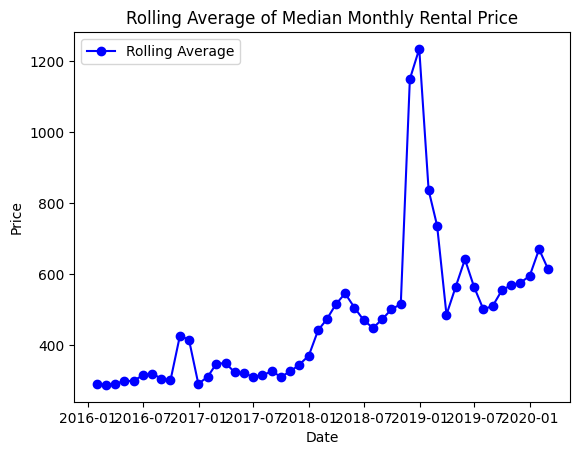

In [48]:
plt.plot(rolling_average, marker='o', linestyle='-', color='b', label='Rolling Average')
plt.title('Rolling Average of Median Monthly Rental Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

I'd have to investigate if those are just extremely luxurious properties, are those duplicates, erroneous records or whatever, might as well ask for all those, but based on what I've seen those numbers are around the ceiling but not unrealistic. 29 of November is very sus, something that would need to be confirmed, maybe it was a db bulk drop update from an agency at the end of the month, thus pumping up the numbers tremendously, most are Rome/Milan so the price could be justified, up to 360 sqrm, though not a log of data. \

Helped us notice something extremely unusual, it could've been an issue. The tren is seen, but the spike takes all the attention.

In [49]:
df_date_index[df_date_index['price'] > 6000]

,city,category,price,furnished,total_size,registration_possible,washing_machine,tv,balcony,garden,terrace,adjusted_size
created_at,,,,,,,,,,,,
2016-09-27 12:07:17,Rome,NaN,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-29 12:49:14,Venice,Apartment,6202.79,,NaN,,yes,yes,,,,NaN
2018-11-29 12:53:04,Rome,Apartment,8985.76,,NaN,,yes,yes,,no,,NaN
2018-11-29 12:59:47,Rome,Apartment,6412.76,yes,150.0,yes,yes,yes,,,,150.0
2018-11-29 13:00:27,Milan,Apartment,6036.94,,NaN,,yes,yes,,,,NaN
2018-11-29 13:00:36,Rome,Apartment,9729.76,,NaN,,yes,yes,,,,NaN
2018-11-29 13:06:49,Rome,Apartment,6358.69,,NaN,,yes,yes,,,,NaN
2018-11-29 13:07:22,Rome,Apartment,6119.87,,NaN,,yes,yes,,,,NaN
2018-11-29 13:13:30,Milan,Apartment,6634.00,,NaN,,yes,yes,,,,NaN


In [50]:
df_date_index = df[~((df['created_at'] >= '2018-11-29 12:49:14') & (df['created_at'] <= '2019-01-29 17:34:24') & (df['price'] > 4500))]
df_date_index.set_index('created_at', inplace=True)

In [75]:
roll_avg = df_date_index['price'].resample('M').median().rolling(window=15).mean()

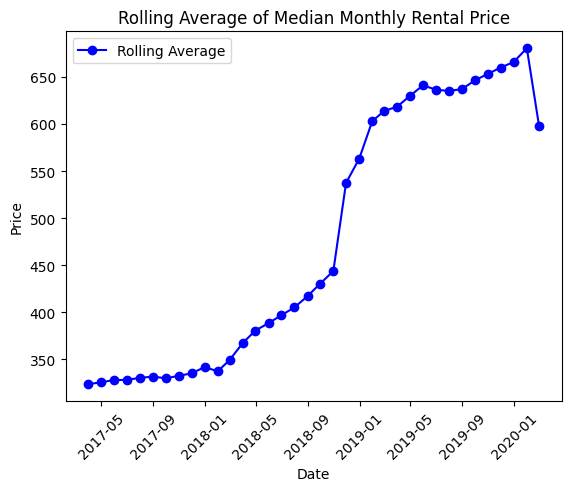

In [76]:
plt.plot(roll_avg, marker='o', linestyle='-', color='b', label='Rolling Average')
plt.title('Rolling Average of Median Monthly Rental Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

 Basically the median rent doubled + lots of luxury property added skewing the data a bit. 

 Coronavirus plummeted the prices, no travel, no relocations, makes sense. Representing the trend, and the consequences of the contextual events.

In [53]:
df.groupby([df['created_at'].dt.year, 'city']).price.median().groupby(level=0, group_keys=False).nlargest(3).reset_index()

,created_at,city,price
0,2016,Milan,552.0
1,2016,Bolzano,500.0
2,2016,Palermo,500.0
3,2017,Bolzano,650.0
4,2017,Milan,620.0
5,2017,Prato,487.5
6,2018,Milan,760.0
7,2018,Florence,739.5
8,2018,Rome,700.0
9,2019,Verona,1200.0


# Cities of Interest

I'll repeat myself and say that I find it interesting that Rome has so few properties available, I still assume it's because it's all rented, or the landlords are just more interested in short-term renting, which would make sense. Milan being sort of a central hub for Italy makes sense being top1.

In [54]:
df.groupby('city').agg({'price': 'median', 'created_at': 'count'}) \
                .rename(columns={'price': 'median_price', 'created_at': 'property_count'}) \
                .assign(city_rank=lambda x: x['property_count'].rank(ascending=False)).loc[lambda x: x['city_rank'] <= 10].sort_values(by='city_rank').reset_index()

,city,median_price,property_count,city_rank
0,Milan,690.0,2143,1.0
1,Bologna,290.0,1828,2.0
2,Pisa,300.0,1511,3.0
3,Florence,600.0,1270,4.0
4,Turin,430.0,622,5.0
5,Rome,500.0,579,6.0
6,Unknown,350.0,466,7.0
7,Trento,280.0,242,8.0
8,Siena,320.0,187,9.0
9,Padova,400.0,116,10.0


In [55]:
df.groupby('category')['registration_possible'].value_counts()

category      registration_possible
Apartment     yes                       897
                                        360
              no                        152
Private Room  yes                      1894
              no                        378
                                        199
Shared Room   yes                       606
              no                        137
                                          1
Studio        yes                       215
              no                         46
                                         31
Name: count, dtype: int64

# Possibility of Registration based on the Category 
It's unexpected that 1/4 of the registration data for apartments is unavailable, although I'd assume it skews heavily into 'yes'
Overall very high rate

In [56]:
df.groupby('category')['registration_possible'] \
    .value_counts(normalize=True) \
    .unstack(fill_value=0) \
    .mul(100) \
    .round(2).astype(str) + '%'

registration_possible,,no,yes
category,,,
Apartment,25.55%,10.79%,63.66%
Private Room,8.05%,15.3%,76.65%
Shared Room,0.13%,18.41%,81.45%
Studio,10.62%,15.75%,73.63%


# An estimate of property sizes

plenty of them were totally incorrect, I've tried to make an approximation of what it could realistically look like 

In [ ]:
df.groupby('category')['adjusted_size'].agg(['mean', 'median'])

,mean,median
category,,
Apartment,63.627457,60.0
Private Room,46.336049,22.5
Shared Room,96.596932,90.0
Studio,38.417279,30.0


# Price by Category

The question why don't people marry or move out of the family home seems answered, studio looks affordable

In [57]:
df.groupby('category')['price'].agg(['mean', 'median'])

,mean,median
category,,
Apartment,1635.087778,1500.0
Private Room,416.210272,360.0
Shared Room,314.847414,260.0
Studio,659.325637,450.0


...unless it's Milan, where of course all jobs are
even sharing a room is painful

In [58]:
df[df['city'] == 'Milan'].groupby('category')['price'].agg(['mean', 'median']).reset_index()

,category,mean,median
0,Apartment,1990.455236,1800.0
1,Private Room,630.618139,620.0
2,Shared Room,451.691781,441.0
3,Studio,1161.325782,1090.0


In general, it ended up being more of an socio-economical analysis of Italy in general.
I acknowledge the fact that one could also analyze the different types of correlations between the rest of minor stuff like tv,terrace etc
but to be honest, when it comes down to property, there are only so much truly important variables, those are the City, the district(how central it is), the size, and the price. I've done the registration simply because it might be incredibly important for the rentee, the rest are very minor and optional. 

In [59]:
df.to_csv('fixed.csv')